In [9]:
#@title Importação de Bibliotecas
import matplotlib.pyplot as plt
import numpy as np
j = np.complex(0, 1)


# Questão B

In [10]:
t = [round(x,2) for x in list(np.linspace(-2,2,401))] #Espaço amostral do tempo de -2 até 2 com passo de 0.01
x_t = [-x/2 for x in t] #Função "dente-de-serra" no período T = 4

def sum_aprox(N): #Função de aproximação do "dente de serra" pela série de Fourier
  x = []
  for i in range(len(t)): 
      soma = 0
      for k in range(-N,N+1):
          if k != 0:
            soma = soma + (-j)*(((-1)**k)/(k*np.pi))*np.exp(j*k*(np.pi/2)*t[i])
          else:
            soma = soma
      x.append(np.real(soma)) #como a parte imaginária é sempre nula, separamos apenas a parte real
  return x


# Questão C

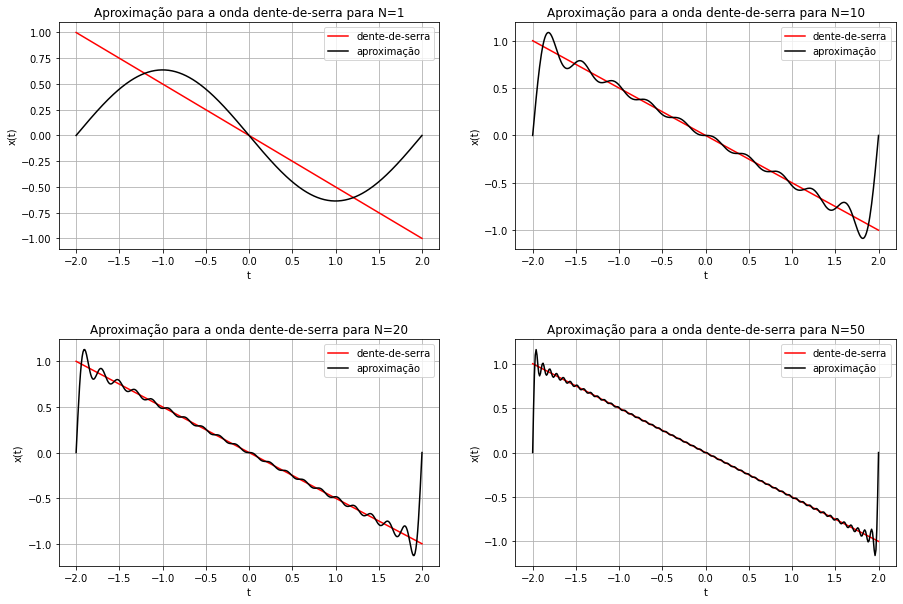

In [11]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.subplot(221)
plt.grid()
plt.title('Aproximação para a onda dente-de-serra para N=1')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t, x_t, label='dente-de-serra', color = 'r')
plt.plot(t, sum_aprox(1), color = 'k', label='aproximação')
plt.legend(loc='upper right')

plt.subplot(222)
plt.grid()
plt.title('Aproximação para a onda dente-de-serra para N=10')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t, x_t, label='dente-de-serra', color = 'r')
plt.plot(t, sum_aprox(10), color = 'k', label='aproximação')
plt.legend(loc='upper right')

plt.subplot(223)
plt.grid()
plt.title('Aproximação para a onda dente-de-serra para N=20')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t, x_t, label='dente-de-serra', color = 'r')
plt.plot(t, sum_aprox(20), color = 'k', label='aproximação')
plt.legend(loc='upper right')

plt.subplot(224)
plt.grid()
plt.title('Aproximação para a onda dente-de-serra para N=50')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t, x_t, label='dente-de-serra', color = 'r')
plt.plot(t, sum_aprox(50), color = 'k', label='aproximação')
plt.legend(loc='upper right')
plt.show()


# Questão D

In [12]:

#função que calcula a Energia do erro em N
def E_n(N):
  soma = 0
  aprox = sum_aprox(N)
  for i in range(len(t)):
    soma += (x_t[i]-aprox[i])**2
  E = soma/(len(t))
  return E 

print("Energia do erro em N = 01: ", round(E_n(1),5), " J", sep="")
print("Energia do erro em N = 10: ", round(E_n(10),5), " J", sep="")
print("Energia do erro em N = 20: ", round(E_n(20),5), " J", sep="")
print("Energia do erro em N = 50: ", round(E_n(50),5), " J", sep="")

Energia do erro em N = 01: 0.13287 J
Energia do erro em N = 10: 0.02182 J
Energia do erro em N = 20: 0.01252 J
Energia do erro em N = 50: 0.00692 J


# Questão E

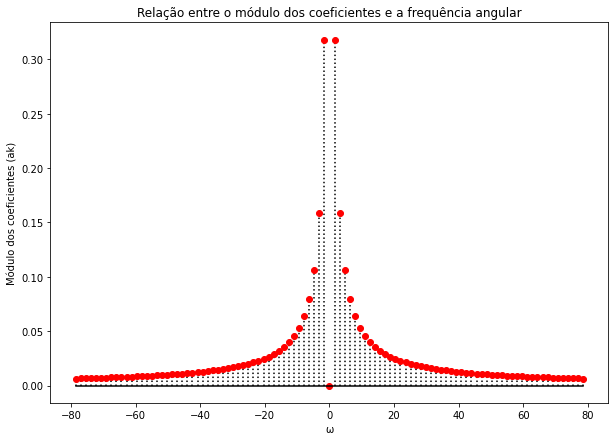

In [13]:
kw = []
ak = []
for k in range(-50,50+1):
  kw.append(k*(np.pi/2))
  if k != 0:
    ak.append((-j)*(((-1)**k)/(k*np.pi)))
  else:
    ak.append(0)
ak_modulo = np.abs(ak)

plt.figure(figsize=(10,7))
plt.stem(kw, ak_modulo, linefmt = (':','k'), markerfmt = ('o','red'), basefmt = 'k', use_line_collection = True)
plt.title('Relação entre o módulo dos coeficientes e a frequência angular')
plt.ylabel('Módulo dos coeficientes (ak)')
plt.xlabel('ω')
plt.show()

# Questão F

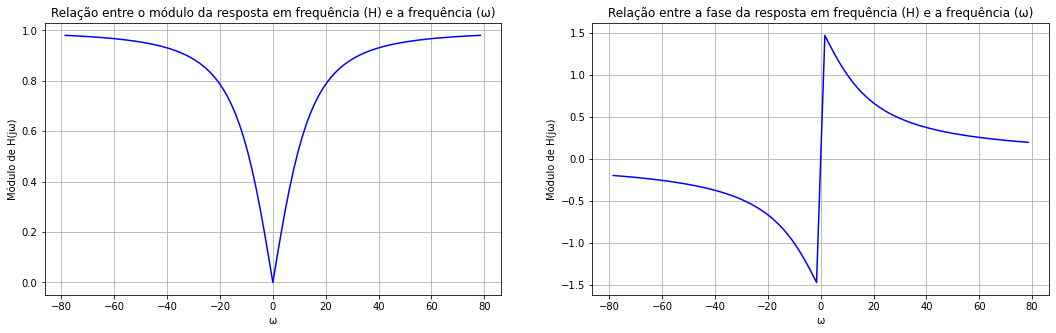

In [37]:
ωc = 10 #Valor da frequência de corte (1/RC) para C = 1µF e R = 100kΩ

ω = []
H_jω = []
for k in range(-50,50+1):
  ω.append(k*(np.pi/2))
  if k != 0:
    H_jω.append((1/(1-j*(ωc/k))))
  else:
    H_jω.append(0)

H_jω_modulo = np.abs(H_jω) #Módulo da resposta em frequência
H_jω_fase = np.angle(H_jω) #Fase da resposta em frequência

plt.figure(figsize=(18,5))
plt.subplots_adjust(wspace = 0.2)

plt.subplot(121)
plt.grid()
plt.title('Relação entre o módulo da resposta em frequência (H) e a frequência (ω)')
plt.xlabel('ω')
plt.ylabel('Módulo de H(jω)')
plt.plot(ω, H_jω_modulo, color = 'b')

plt.subplot(122)
plt.grid()
plt.title('Relação entre a fase da resposta em frequência (H) e a frequência (ω)')
plt.xlabel('ω')
plt.ylabel('Módulo de H(jω)')
plt.plot(ω, H_jω_fase, color = 'b')

plt.show()


# Questão G

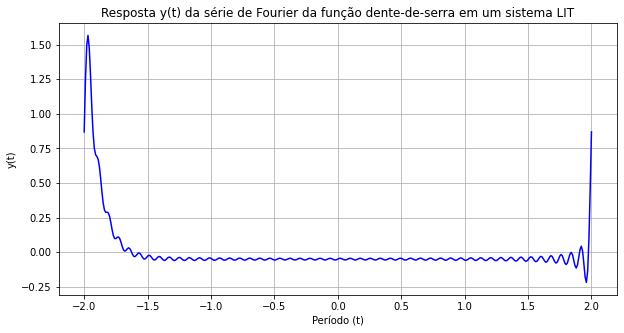

In [55]:
#Função para calcular a saída do sistema LIT do item (f) em função de N quando a entrada for a onda dente-de-serra
def resposta_y_t(N):
  y = []
  for i in range(len(t)):
      soma = 0 
      for k in range(-N,N+1):
        if k != 0:
          ak = (-j)*(((-1)**k)/(k*np.pi))
          H = (1/(1-j*(ωc/(k*(np.pi/2)))))
          soma += ak*H*np.exp(j*k*(np.pi/2)*t[i]) #Somatório (-N,N) de ak*H(jkw0)*e^(jkw0t)
        else:
          soma = soma
      y.append(np.real(soma))
  return y

plt.figure(figsize=(10,5))
plt.grid()
plt.plot(t, resposta_y_t(50), color="b")
plt.title('Resposta y(t) da série de Fourier da função dente-de-serra em um sistema LIT')
plt.xlabel('Período (t)')
plt.ylabel('y(t)')
plt.show()